#Loading

In [1]:
from google.colab import drive

drive.mount("/content/gdrive")
!pwd

Mounted at /content/gdrive
/content


In [2]:
#put your own path in google drive
%cd "/content/gdrive/MyDrive/abalone"
!ls

/content/gdrive/MyDrive/abalone
abalone.data  abalone.names  Index


In [3]:
import pandas as pd

# name of columns
columns = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]

# read file abalone.data with columns' names
df = pd.read_csv('abalone.data', names=columns)

# print 100 first rows of DataFrame
df.head(100)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
...,...,...,...,...,...,...,...,...,...
95,M,0.665,0.535,0.195,1.6060,0.5755,0.3880,0.480,14
96,M,0.535,0.435,0.150,0.7250,0.2690,0.1385,0.250,9
97,M,0.470,0.375,0.130,0.5230,0.2140,0.1320,0.145,8
98,M,0.470,0.370,0.130,0.5225,0.2010,0.1330,0.165,7


Reading the file abalone.names, we already know that there is no missing value. Anyway, we are going to check it for being sure. I checked this column separatelly because it is the only one that is not numeric value.

In [4]:
# Check of unique values in the column "Sex"
unique_values = df['Sex'].unique()
print("Valeurs uniques dans la colonne 'Sex' :", unique_values)


Valeurs uniques dans la colonne 'Sex' : ['M' 'F' 'I']


Now we are sure that there is no other values.

In [5]:
# Vérifier les valeurs manquantes dans tout le DataFrame
missing_values = df.isnull().sum()
print("Missing values per column :")
print(missing_values)


Missing values per column :
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64


Getting some informaiton about the types:

We can now classifiy the variables. All the variables are quantitative - numeric, except for "Sex", this one is categoricaal - nominal.



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Now we will check for the nine columns (features) if there is some instances that are too big. We can do it with graphs for a better visualisation or taking the min/max instances, the mean and the volatility. We will do both.

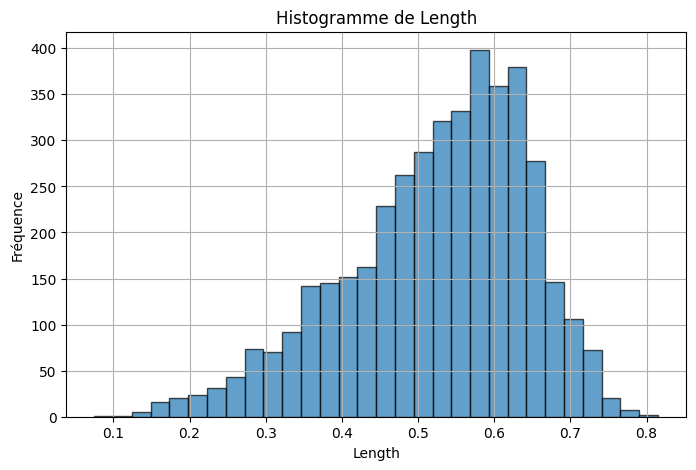

Statistiques pour Length:
  - Max: 0.815
  - Min: 0.075
  - Moyenne: 0.5239920995930094
  - Volatilité (Écart-type): 0.12009291256479956

--------------------------------------------------



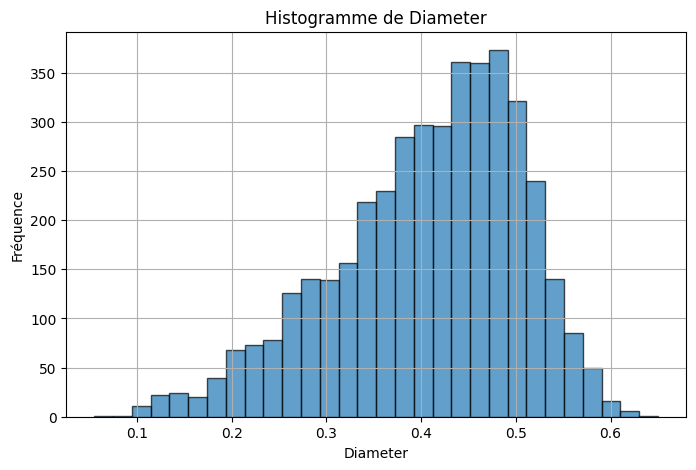

Statistiques pour Diameter:
  - Max: 0.65
  - Min: 0.055
  - Moyenne: 0.40788125448886764
  - Volatilité (Écart-type): 0.09923986613365945

--------------------------------------------------



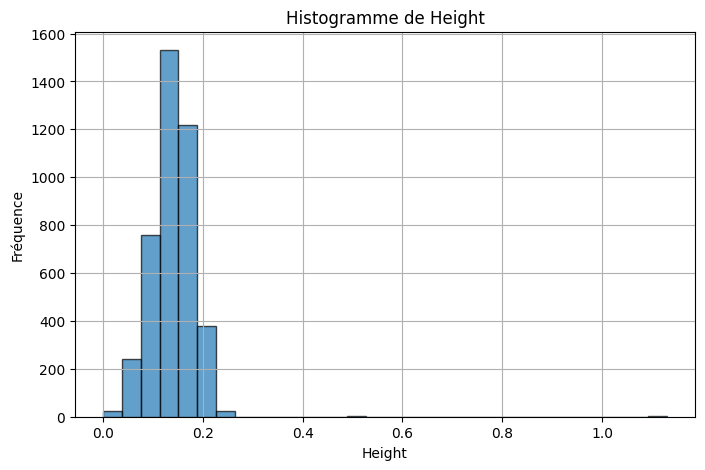

Statistiques pour Height:
  - Max: 1.13
  - Min: 0.0
  - Moyenne: 0.13951639932966242
  - Volatilité (Écart-type): 0.041827056607257274

--------------------------------------------------



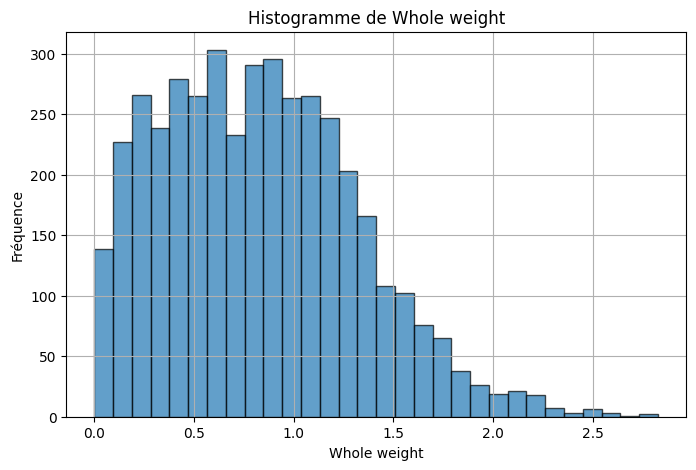

Statistiques pour Whole weight:
  - Max: 2.8255
  - Min: 0.002
  - Moyenne: 0.8287421594445774
  - Volatilité (Écart-type): 0.4903890182309977

--------------------------------------------------



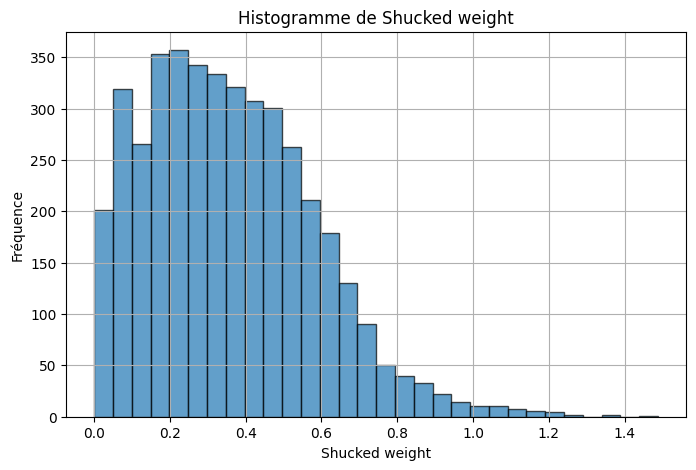

Statistiques pour Shucked weight:
  - Max: 1.488
  - Min: 0.001
  - Moyenne: 0.35936748862820206
  - Volatilité (Écart-type): 0.22196294903322014

--------------------------------------------------



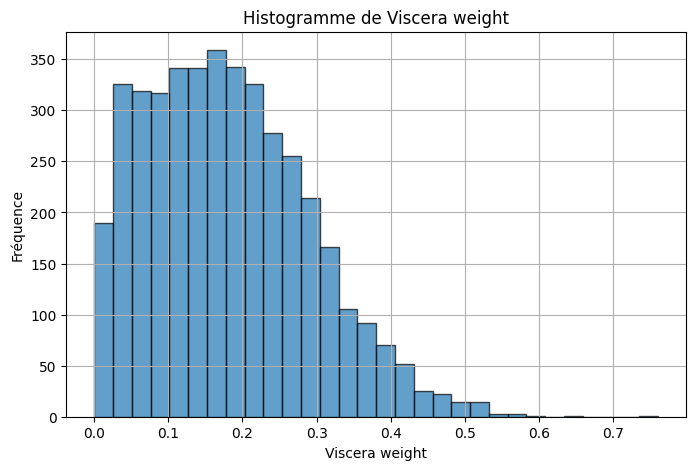

Statistiques pour Viscera weight:
  - Max: 0.76
  - Min: 0.0005
  - Moyenne: 0.1805936078525257
  - Volatilité (Écart-type): 0.10961425025968446

--------------------------------------------------



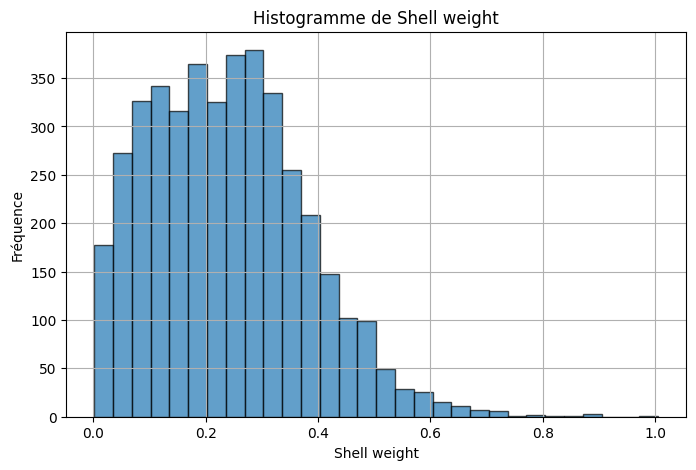

Statistiques pour Shell weight:
  - Max: 1.005
  - Min: 0.0015
  - Moyenne: 0.23883085946851804
  - Volatilité (Écart-type): 0.1392026695223861

--------------------------------------------------



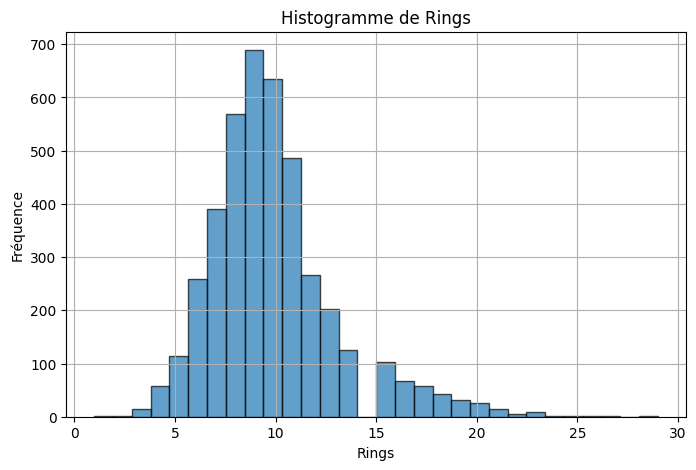

Statistiques pour Rings:
  - Max: 29
  - Min: 1
  - Moyenne: 9.933684462532918
  - Volatilité (Écart-type): 3.2241690320681284

--------------------------------------------------



In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
columns = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
df = pd.read_csv('abalone.data', names=columns)

# Sélectionner uniquement les colonnes numériques
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Créer un histogramme pour chaque variable numérique et calculer les statistiques
for col in numeric_columns:
    # Histogramme
    plt.figure(figsize=(8, 5))
    plt.hist(df[col], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogramme de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.grid(True)
    plt.show()

    # Calcul des statistiques
    max_value = df[col].max()
    min_value = df[col].min()
    mean_value = df[col].mean()
    volatility = df[col].std()  # Écart-type

    print(f'Statistiques pour {col}:')
    print(f'  - Max: {max_value}')
    print(f'  - Min: {min_value}')
    print(f'  - Moyenne: {mean_value}')
    print(f'  - Volatilité (Écart-type): {volatility}')
    print('\n' + '-'*50 + '\n')


Now we can analize the rersults. Firstly, looking at the lenght and diameter histograms, we see that there is no "aberrant" or outlayers values for this two features. However it is not the case for the height and others features:

#Outlayers:
We have two instances that "appears to deviate markedly from
other members of the sample in which it occurs"(Grubbs). In this section we will check the nature of that disproportion.

Let's print the two ones, to see if there is only one feature disproportionned:

In [8]:
import pandas as pd
# Identifier la colonne de poids (par exemple "Whole weight")
weight_column = 'Whole weight'

# Trouver les deux instances avec le poids le plus élevé sans modifier le dataset
top_two_instances = df.nlargest(2, weight_column)

# Imprimer les résultats
print(top_two_instances)

# Exclure les colonnes non numériques (comme "Sex")
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculer et imprimer la moyenne de chaque feature numérique
means = numeric_df.mean()

print("mean for each feature :")
print(means)

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
891    M   0.730     0.595    0.23        2.8255          1.1465   
1763   M   0.775     0.630    0.25        2.7795          1.3485   

      Viscera weight  Shell weight  Rings  
891            0.419         0.897     17  
1763           0.760         0.578     12  
mean for each feature :
Length            0.523992
Diameter          0.407881
Height            0.139516
Whole weight      0.828742
Shucked weight    0.359367
Viscera weight    0.180594
Shell weight      0.238831
Rings             9.933684
dtype: float64


Here we have checked that there is no anomaly, it this case we just have two big specimen of abalones. We have basically 3 options:

1) reducing the weights of outliers (trimming weight)

2) changing the values of outliers (Winsorisation, trimming, imputation)

3) using robust estimation techniques (M-estimation).

In our case, with two outlayers but not wrong data, we will none of this treatment. However, we will proceed nextly to the normalisation of the features that will be used in the linear regression.

Let's check if we have duplicated data:

In [9]:
# Vérifier si des doublons existent
duplicates = df.duplicated()

# Afficher les lignes dupliquées
duplicate_rows = df[duplicates]

if not duplicate_rows.empty:
    print(f"Number of duplicated data : {duplicate_rows.shape[0]}")
    print("Duplicated :")
    print(duplicate_rows)
else:
    print("No duplicated data has beenn found.")

No duplicated data has beenn found.


Good, we do not have any duplicated data.

Now we can generate all the scatter plots to see if there is some correlations:

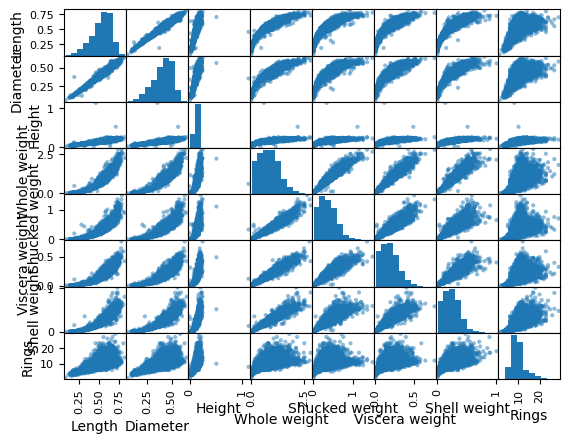

In [10]:
pd.plotting.scatter_matrix(df);


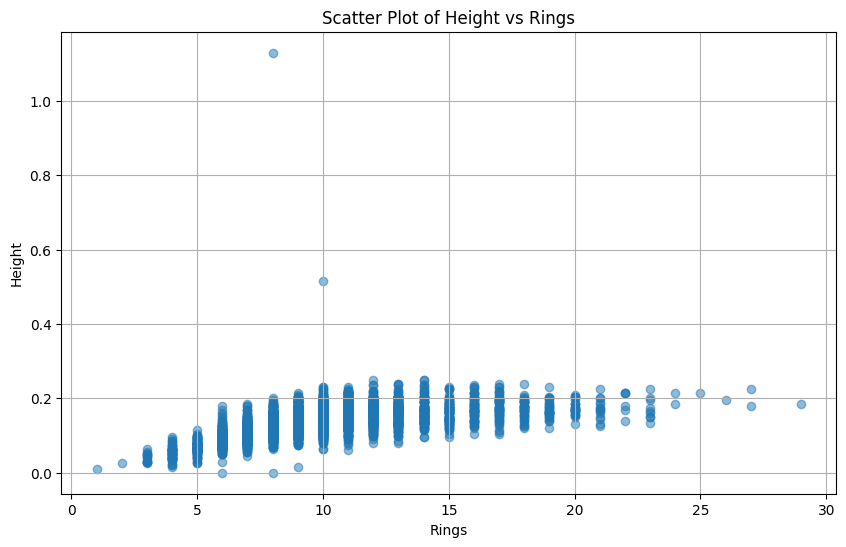

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Rings'],df['Height'] , alpha=0.5)  # alpha pour la transparence des points
plt.title('Scatter Plot of Height vs Rings')
plt.ylabel('Height')
plt.xlabel('Rings')
plt.grid(True)
plt.show()

We see that the average height per ring do not realy progress after 10 rings, I will do amn other plot to have a better vizualisation:

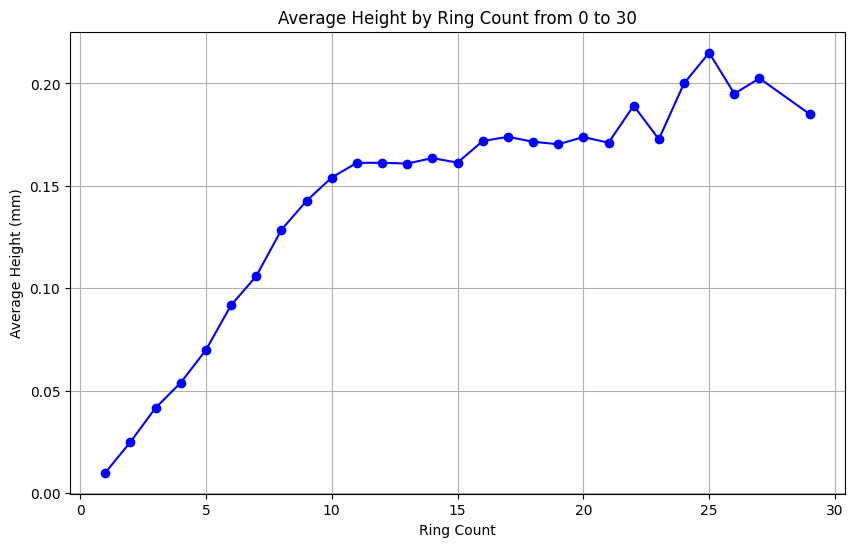

In [12]:

# Filter data to include only Rings from 0 to 30
filtered_data = df[df['Rings'].between(0, 30)]

# Calculate the mean Height for each Rings value
mean_heights = filtered_data.groupby('Rings')['Height'].mean()

# Plotting the mean Heights against Ring counts
plt.figure(figsize=(10, 6))
plt.plot(mean_heights.index, mean_heights.values, marker='o', linestyle='-', color='b')
plt.title('Average Height by Ring Count from 0 to 30')
plt.xlabel('Ring Count')
plt.ylabel('Average Height (mm)')
plt.grid(True)
plt.show()

From 15 (ring) to 30, it is not a clearly progression, thoses values will be hard to predict.

We see that some features are strongly correlated, for example the lenght and the diameter, here the diameter is perpanducular to the lenght.
  
In the last plot we see the average height in milimeters (Y axe) and the number of rings (axe x) fro  0 to 30. As we saw in the report of the regression model, the best R-squared was when we did  not use the 'Height' variable.
The most important are those correlated to the rings, because it is the ring that our model will have to predict (number of rings + 1.5 is equal to the age in years). However, we have a feature that we are not using: "SEX".

It was the only non-numeric feature, thi9s is why we did not use it. Let's do some grachs/representations of this feature.:

Sex
F    11.129304
I     7.890462
M    10.705497
Name: Rings, dtype: float64


<ipython-input-13-0b20f9d48d46>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_rings_per_sex.index, y=mean_rings_per_sex.values, palette="Set1")


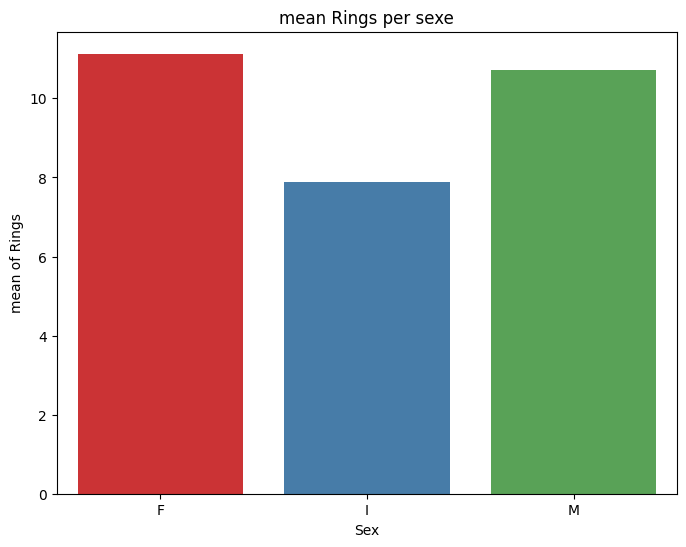

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


mean_rings_per_sex = df.groupby('Sex')['Rings'].mean()

# Afficher les résultats
print(mean_rings_per_sex)

# Visualiser les moyennes avec un graphique en barres
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_rings_per_sex.index, y=mean_rings_per_sex.values, palette="Set1")
plt.title("mean Rings per sexe")
plt.xlabel("Sex")
plt.ylabel("mean of Rings")
plt.show()


The variable sex being the only one who is not a numeric one, but a class, M, F or I, we have two possiblities for convert it on numeric data. The first one would be to add three columns (M,F,I) and fill it with zeros and ones. The other, seeing that there is a small correlation between the rings and the sex, we can put a coefficient instead of the three letters, this solutions is the one we will choose. Let's do the conversion:

In [14]:
# Valeurs moyennes des Rings pour chaque sexe
mean_rings = {'F': 11.129304, 'I': 7.890462, 'M': 10.705497}

# Calcul des valeurs min et max
min_value = min(mean_rings.values())
max_value = max(mean_rings.values())

# Fonction de normalisation Min-Max
def normalize(value, min_value, max_value):
    return (value - min_value) / (max_value - min_value)

# Application de la normalisation
sex_normalized_mapping = {sex: normalize(value, min_value, max_value) for sex, value in mean_rings.items()}

# Remplacer les valeurs de 'Sex' par les valeurs normalisées
df['Sex'] = df['Sex'].map(sex_normalized_mapping)

# Afficher les premières lignes du dataframe pour vérifier
print(df.head())


        Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0  0.869149   0.455     0.365   0.095        0.5140          0.2245   
1  0.869149   0.350     0.265   0.090        0.2255          0.0995   
2  1.000000   0.530     0.420   0.135        0.6770          0.2565   
3  0.869149   0.440     0.365   0.125        0.5160          0.2155   
4  0.000000   0.330     0.255   0.080        0.2050          0.0895   

   Viscera weight  Shell weight  Rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7  


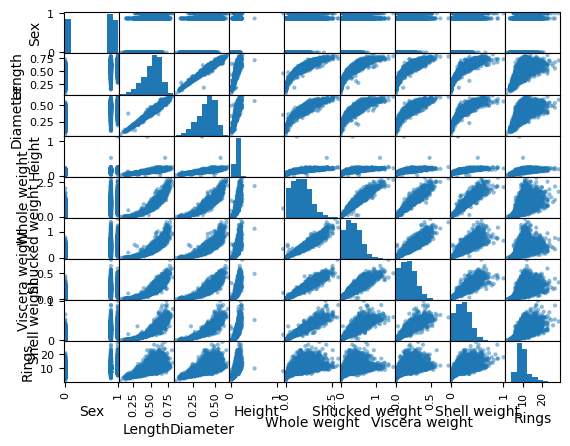

In [15]:
pd.plotting.scatter_matrix(df);


Using linear regression to predict rings in our abalone dataset is a good idea,here is why Linear Regression is Appropriate: Numerical Nature of the Target

*  Variable: Rings are a continuous and quantitative variable, which is ideal for linear regression. This method models the relationship between a continuous dependent variable (the number of rings) and one or more independent variables.
*   Estimation of Values: Linear regression allows us to directly predict a numerical value (in this case, the number of rings) based on other characteristics, which is exactly what we are looking to do.
*   Linear Relationship: If we have reason to believe that there is a linear relationship between characteristics (such as height, weight, etc.) and the number of rings, then linear regression is appropriate.
*   Why Not Use Logistic Regression: Non-Binary Target Variable: Logistic regression is used for categorical target variables (success/failure, yes/no). In our case, the "rings" are not a binary category but a continuous variable.



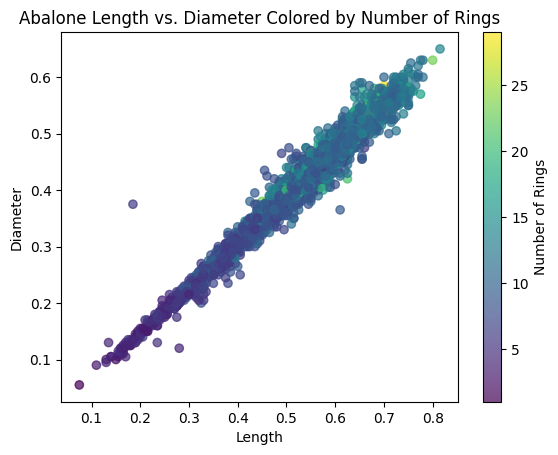

In [16]:

# Define two features for the scatter plot (e.g., 'Length' and 'Diameter')
X1 = df['Length'].values
X2 = df['Diameter'].values
y = df['Rings'].values  # target variable

# Create a scatter plot, using color to represent the target variable (Rings)
plt.scatter(X1, X2, c=y, cmap='viridis', alpha=0.7)

# Add color bar to represent the number of rings
plt.colorbar(label='Number of Rings')

# Add labels and title
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.title('Abalone Length vs. Diameter Colored by Number of Rings')

# Show the plot
plt.show()

Considering the number of rings (from 1 to 29) as classes, to see if we can define some clusters:

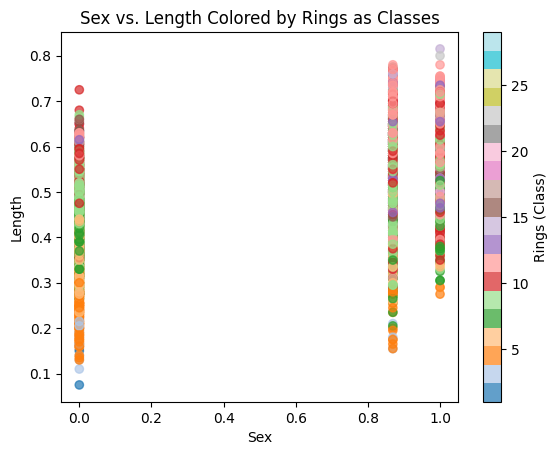

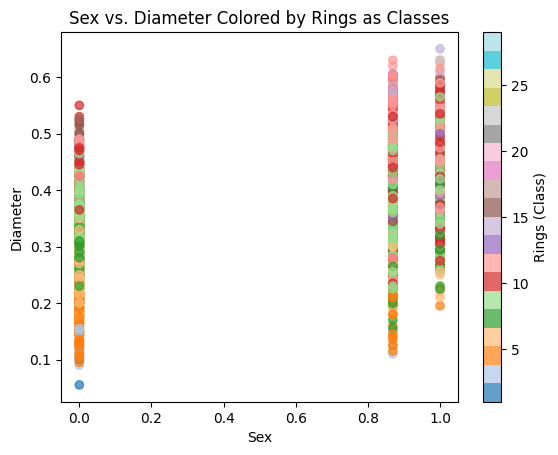

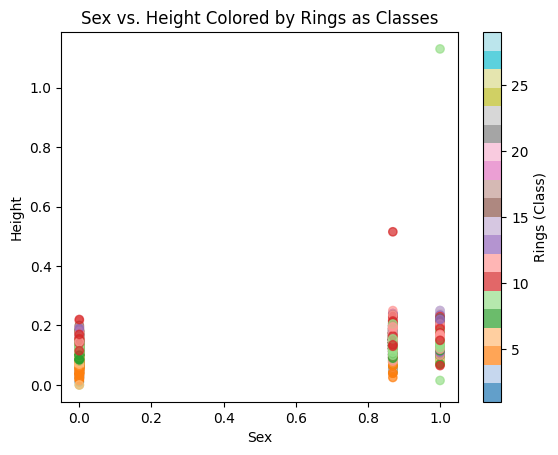

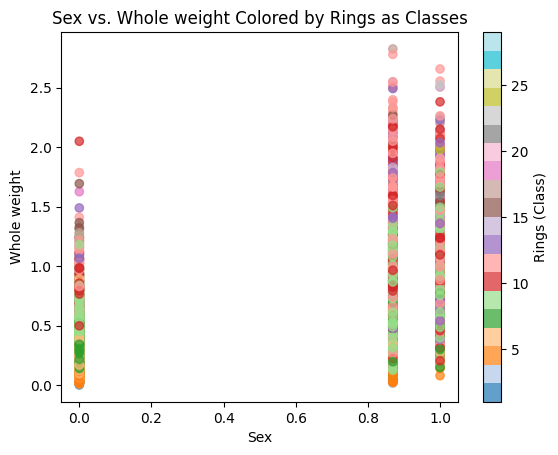

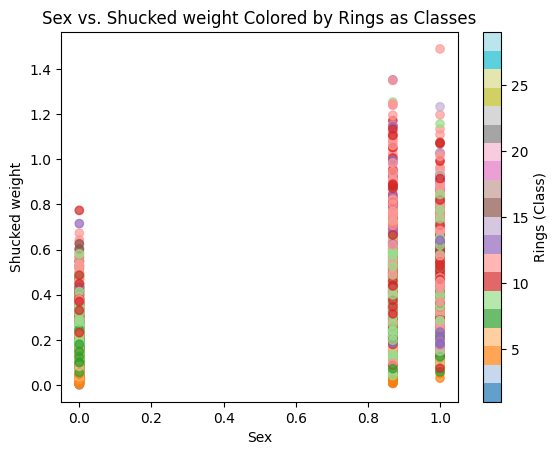

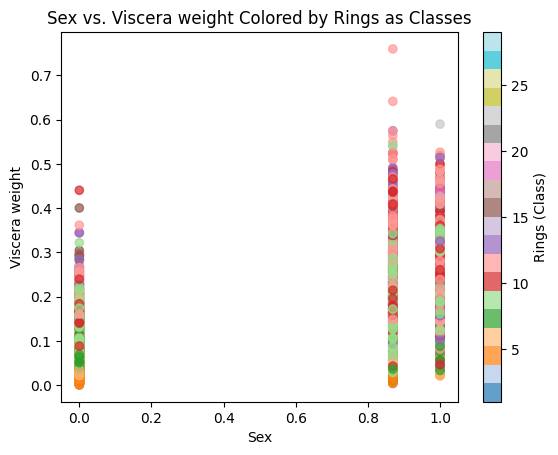

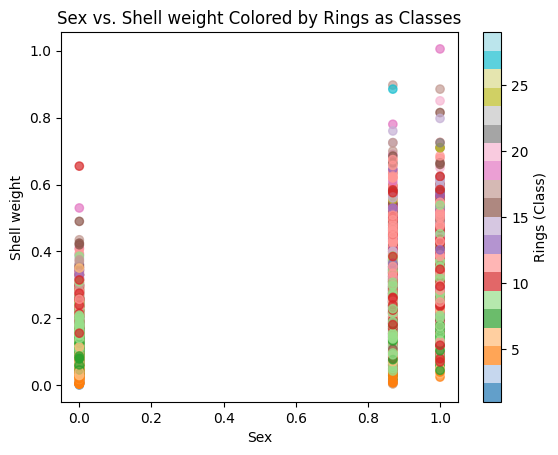

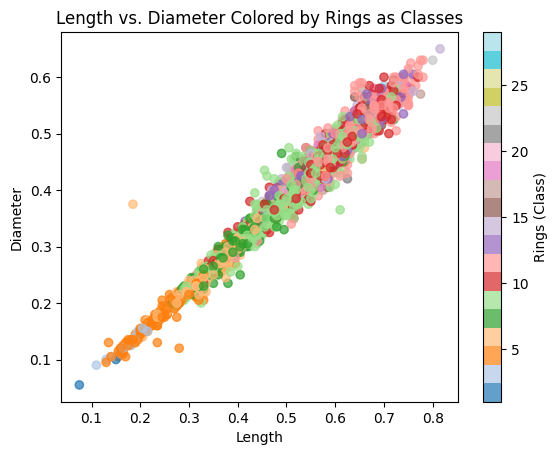

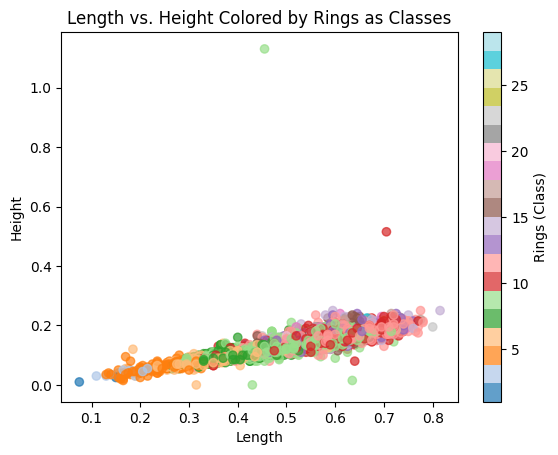

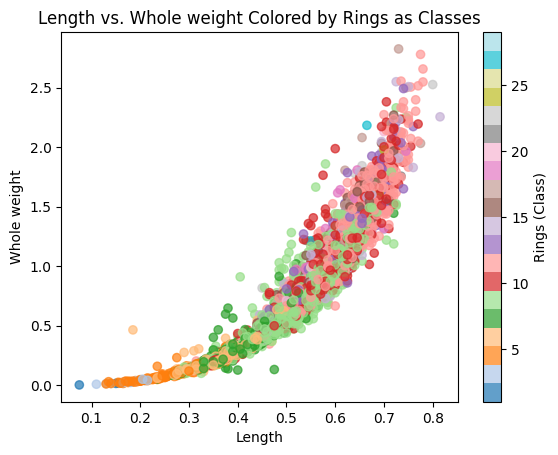

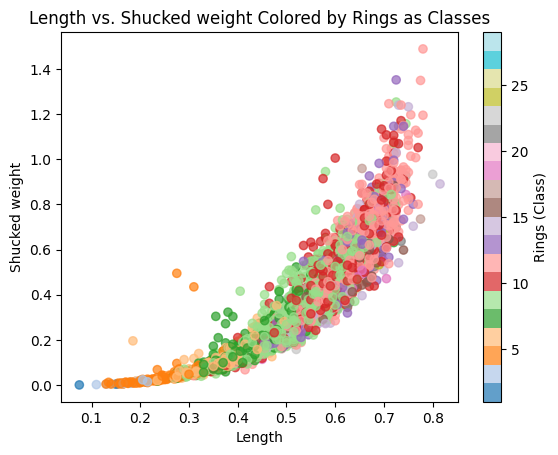

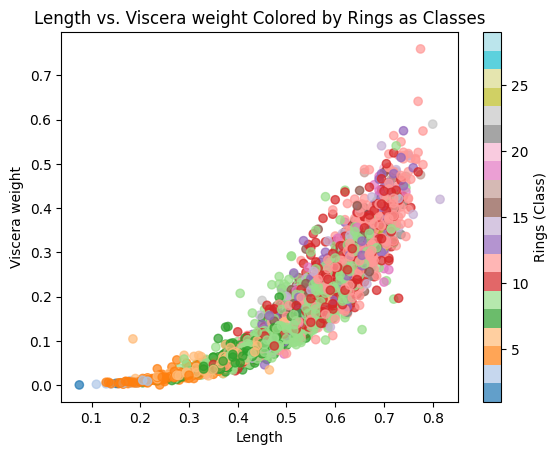

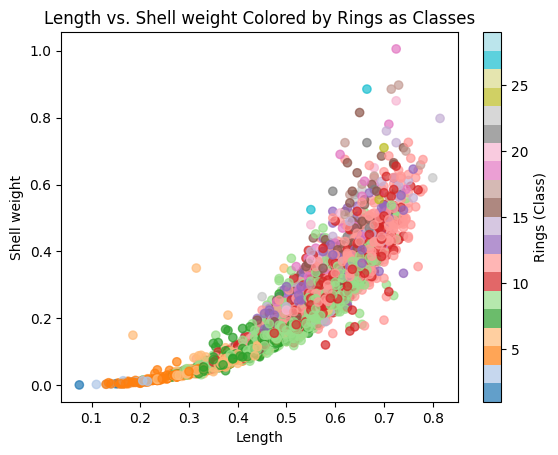

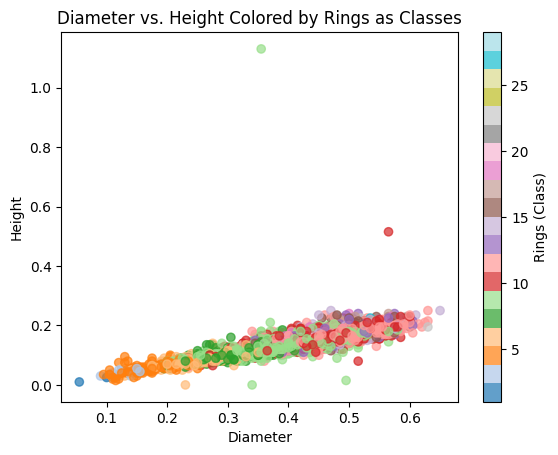

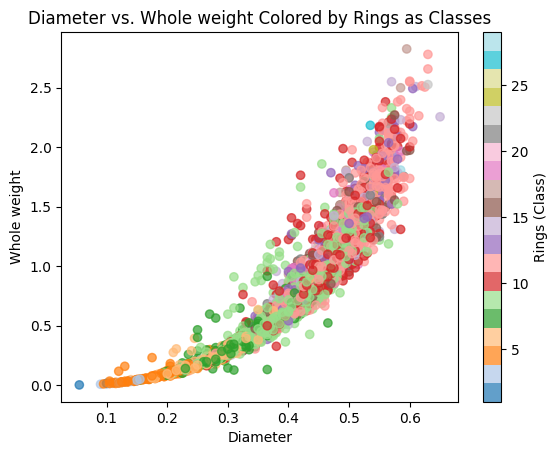

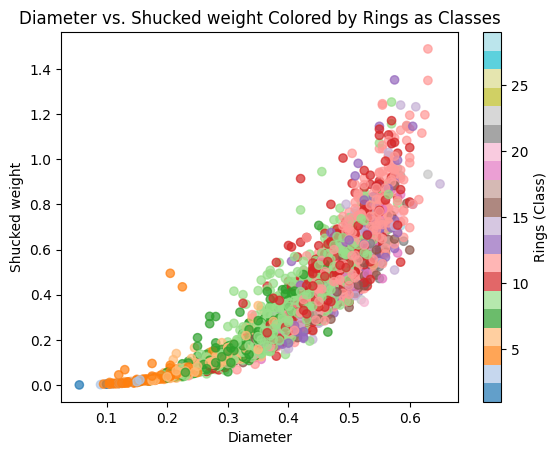

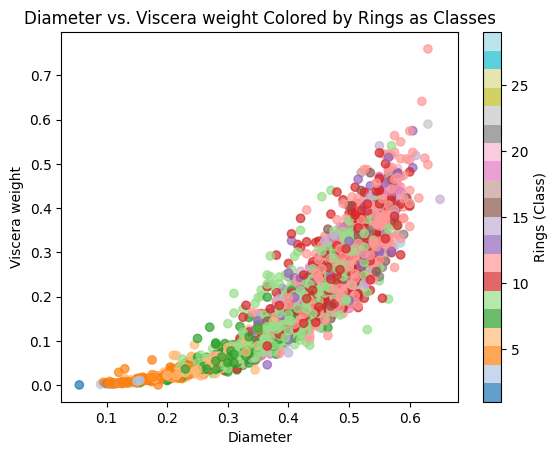

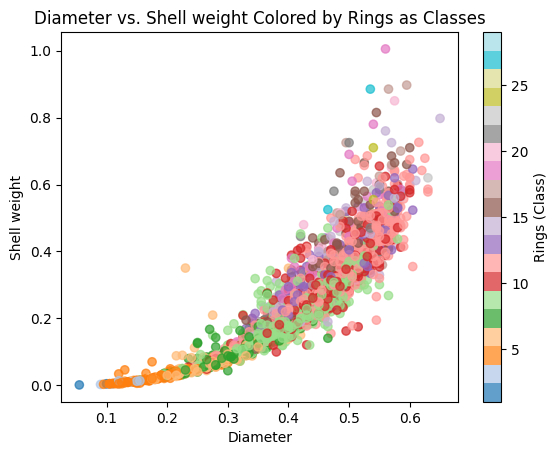

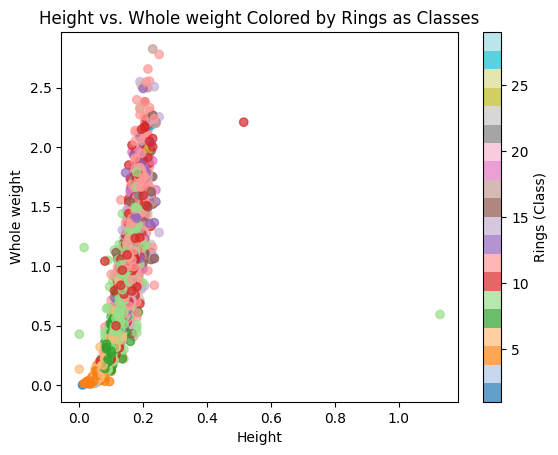

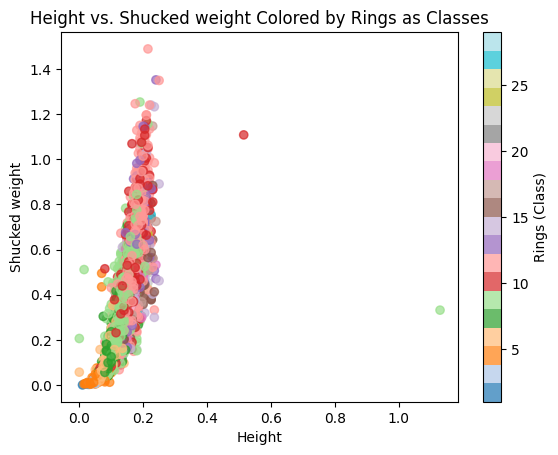

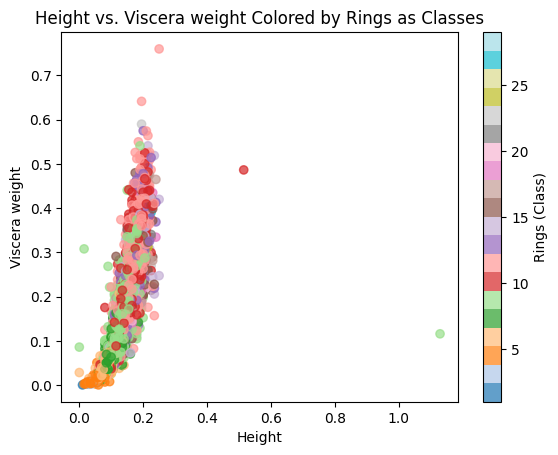

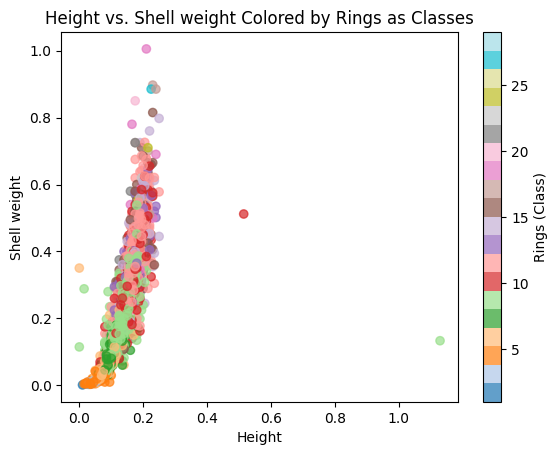

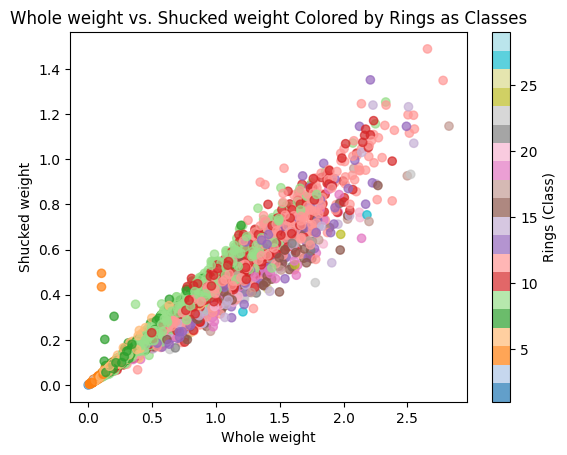

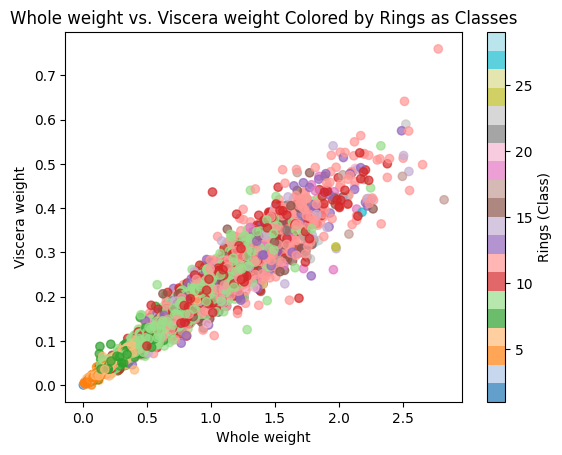

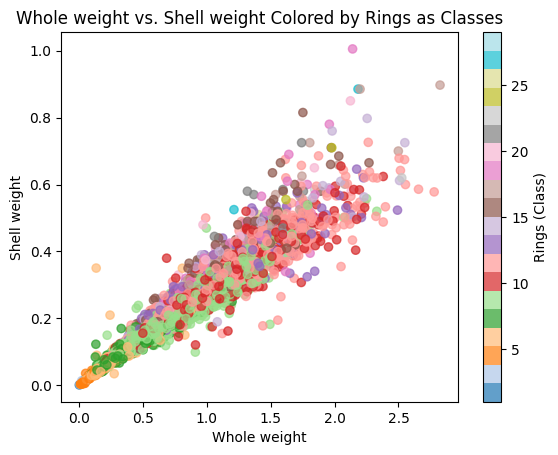

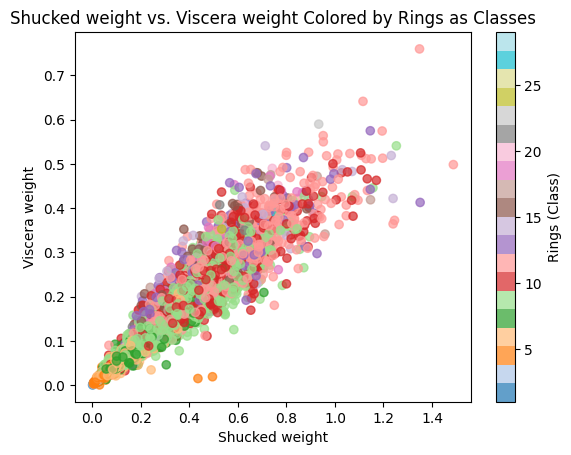

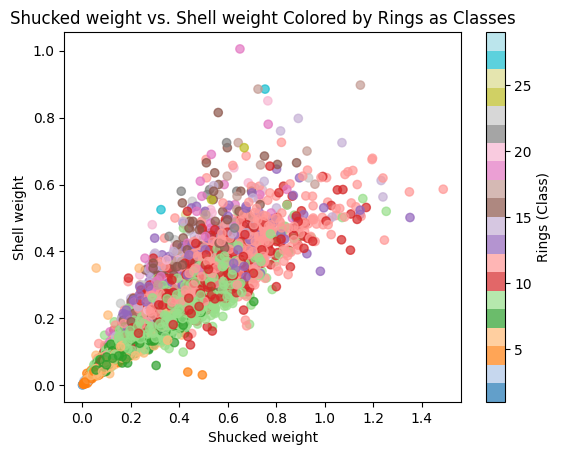

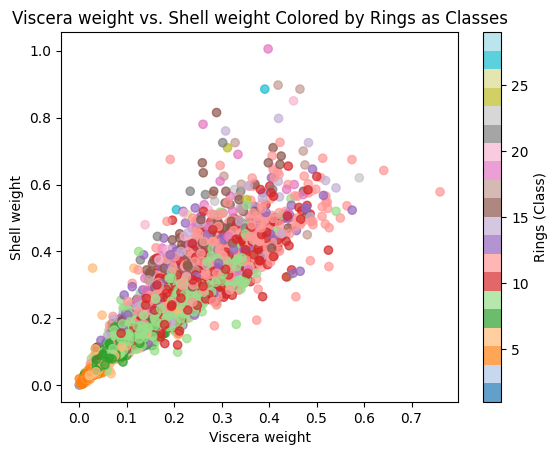

In [17]:
# List of feature names (excluding Rings, which is the target variable)
from itertools import combinations
features = df.columns[:-1]

# Create scatter plots for all pairs of features
for feature1, feature2 in combinations(features, 2):
    X1 = df[feature1].values
    X2 = df[feature2].values
    y = df['Rings'].values  # Rings as classes

    # Create a scatter plot, using color to represent the Rings class
    plt.scatter(X1, X2, c=y, cmap='tab20', alpha=0.7)  # 'tab20' colormap for discrete classes

    # Add color bar to represent the Rings classes
    plt.colorbar(label='Rings (Class)')

    # Add labels and title
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f'{feature1} vs. {feature2} Colored by Rings as Classes')

    # Show the plot
    plt.show()

The purpose of those graphs is to find groups for doing cluster, but I did not.